# Module 8 Final Project

## MRTS Data : ETL, Analysis, and Visualization

**Sajna Subhagan**


# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. Extract-Transform-Load](#2.-Extract-Transform-Load)
    - [2.1 The ETL Process](#2.1-The-ETL-Process)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Read the Data Using Python](#2.4-Reading-the-Data-Using-Python)
         - [2.4.1 Reading Sample Data](#2.4.1-Reading-Sample-Data)
         - [2.4.2 Reading the MRST Data](#2.4.2-Reading-the-MRST-Data)
    - [2.5 Writing an Installation Script](#2.5-Writing-an-Installation-Script)
- [3. Analysis and Visualization](#3.-Project-Description)
    - [3.1 Running Queries in MySQL Workbech](#3.1-Running-Queries-in-MySQL-Workbech)
    - [3.2 Running Queries From Python](#3.2-Running-Queries-From-Python)
    - [3.3 Explore Trends](#3.3-Explore-Trends)
    - [3.4 Explore Percentage Change](#3.4-Explore-Percentage-Change)
    - [3.5 Explore Rolling Time Windows](#3.5-Explore-Rolling-Time-Windows)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

The objective of the project was to develop an ETL process followed by
Data Analysis and Visualization of the Monthly Retail Trade survey dataset from U.S Census Bureau.The dataset provides comprehensive data on the retail economic activity in the United states.The dataset contained data from 1992 to 2021 february. <br>
The process involved<br>
- Taking a deep dive into the dataset,Researching and collecting further information such as the hierarchy of NAICS codes.
- Extracting the dataset from the provided Excel workbook and generating a draft of the schema for Mysql tables that would have a user friendly and efficient design.
- Transforming the dataset using pandas dataframes which included excluding the extraneous columns and rows and replacing the missing values in sales.
- Testing the Mysql to python connection.
- Loading the dataset into separate MYSQL tables, followed by data validation
- Querying the database using conditional statements, and aggregating columns to collect data for further analysis and visualisation
- Examining trends, percentage of changes, and rolling time trends and visualization

[Back to top](#Index)


## 1. Introduction

### Objectives of this project 

> **Create a ETL pipeline of the "Monthly Retail Trade Survey" dataset from the U.S. Census Bureau**

> **Analyze the data**

> **Analyze the trends & Visualize the analysis**

The main objective of the project was to develop an ETL process followed by
Data Analysis and Visualization of the Monthly Retail Trade survey dataset from U.S Census Bureau.The dataset provides comprehensive data on the retail economic activity in the United states.The dataset contained data from 1992 to 2021 february. <br>
The ETL process that stands for Extract Transform and Load process is a data integration process that combines data from multiple data sources into a single consistent data source that is loaded into a database or other target system. The data was extracted from the excel sheet from 1992 to 2020 and transformed into a transactional table structure with the properties being sales, naics code, sales date using pandas module. The nulls (NA) and suppressed values in the sales column were all replaced with(S).The data for the table was saved in .csv files.<br>
A test database was generated and data was loaded using python script to test the fuctionality  of the code. <br>
The MRTS database schema was generated and tested using Mysql work bench and later incorporated into the python script to make the whole ETL process seamless. The data was loaded into the database using the tested python script.<br>
Data validation was done by running queries to match the aggregrate values of the individual kind of businesses to the yearly total provided in the excel sheet which was loaded into the database as a Total table.
Data analysis was done on the various categories, monthly & yearly trends were visualised by extracting the data from the database to pandas dataframes. Time series, Percent change and Rolling window avergae were the concepts used for visualizing the mrts economic data along with the effects of seasonality.<br>
Analysing the sales data clearly indicated either a positive or negative impact of Covid. Further incorporation of data from 2021 and 2022 would provide further insights into the post covid effects and if the trends developed during covid has a lasting effect or not.<br>

[Back to top](#Index)

## 2. Extract-Transform-Load
ETL is a process that extracts, transforms, and loads data from multiple sources to a data warehouse or other unified data repository.ETL provides the foundation for data analytics and machine learning workstreams. Through a series of business rules, ETL cleanses and organizes data in a way which addresses specific business intelligence needs, like monthly reporting, but it can also tackle more advanced analytics, which can improve back-end processes or end user experiences.

[Back to top](#Index)

### 2.1 The ETL Process

Extract
- Read the data from the excel worksheet into a dictionary using pandas module. Each worksheet is stored under a unique key.Used loops to create a dataframe for each worksheet for initial data exploration and to check for nulls, dupicates.

Transform
- Using loops to extract the data under each key to generate the 4 dataframes for the Mysql tables - Total, Adjusted, Combined_category, Unique_category. Saved the dataframes to csv files.

Load
- Created a test database and tested the python script for loading data into the databse and extracting data from the Mysql tables.
- Created the MRTS database schema
- Created a .yaml file with the credentials for the new database.
- Loaded the CSV files to a pandas dataframe which was used to insert data in to the newly created database
- Checked the completeness  & accuracy of the loaded data.

[Back to top](#Index)

### 2.2 Data Exploration

The raw dataset is in the form of an Excel Workbook, from 1992 to 2021 where annual sales are separated into separate sheets. The ETL workflow will only gather sales from 1992 to 2020, 2021 data is still in progress in the provided excel worksheet and contains data only for the months of January and February. The February data is projected estimate.

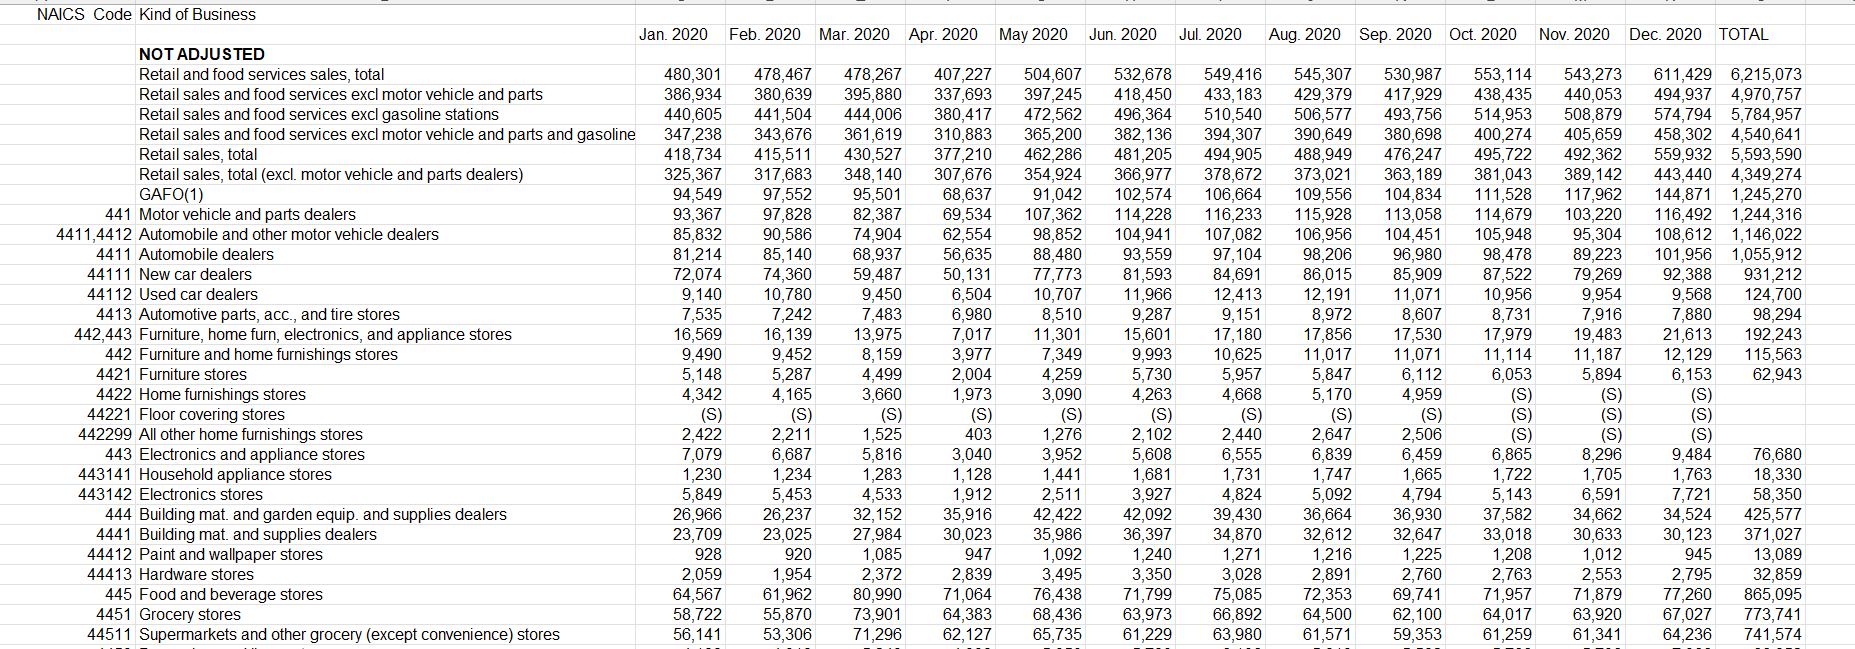

The MRTS utilizes the North American Industry Classification System (NAICS), the standard used by Federal statistical agencies in classifying  business establishments for the purpose of collecting, analysing,and publishing statistical data related to the U.S. business economy. The data that was provided had Naics code starting with digits 44 - 45 indicative of retail trade. The 3 digit codes predominatly being the aggregrate category. for example

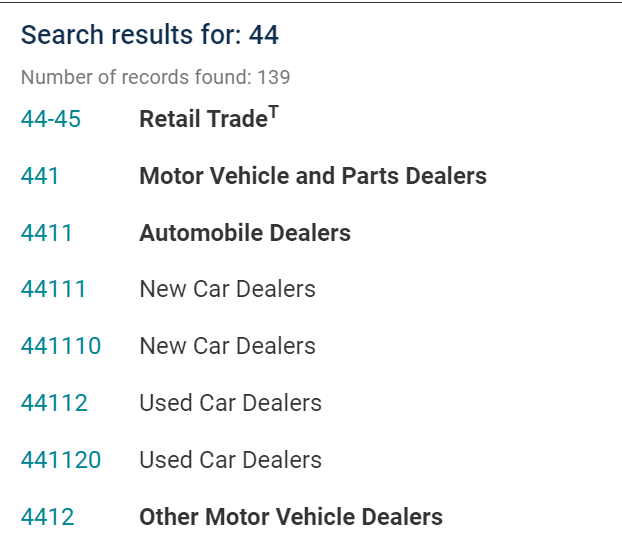

In the above image the naics code for motor Vehicle and parts dealers is 441. The main sub categories are 4411 - Automobile dealers and 4412 -other motor vehicle dealers. The subcategories of 4411- Automobile dealers are -44111, 44112.

The dataset contains null values, suppresed values, NA for sales - the values suppresed or missing as the estimate don not meet publication standards.

[Back to top](#Index)

### 2.3 Data Preparation

Data preparation and extraction involved 
- importing the necessary modules needed
- loading the excel sheet into dictionary using pandas
- Using loops & dictionary.get(key) to generate dataframes of individual sheets
- Excluding the title and the footer of every individual sheet using dataframe.iloc
- Renaming the columns and replacing the months with dates
- Checking for data types of each columns
- Generating new dataframes for the Mysql tables. The sales for each month instead of incorporating as columns has been incorporated into one column using.stack() which I presumed was easier and efficient table structure for database insetion & future updates and also for querying.
    - Total table : Includes the kind of business, Year of sale, Total sales for the year.
    - Combined category table : Includes the values from row index 5 to 11 and had no NAICS code indicative of broad combined category. Columns incorporated are kind of business, Sales, salesdate(generated from the month& year) and a adjusted column with'N' value that indicates not adjusted.
    - Individual category table : Includes businesses with NAICS code . Columns incorporated are kind of business, NAICS_code,  Sales, salesdate(generated from the month& year) and a adjusted column with'N' value that indicates not adjusted.
    - Adjusted table : Includes all sales record under the Adjusted section and Include kind of NAICS_code, business, Sales, salesdate(generated from the month& year) and a adjusted column with'Y' value that indicates adjusted.

- Replacing nulls, na & s with (s) in sales for suppresed values.
- Writing the dataframes to a csv file.


In [1]:
# Import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector
import datetime
import mysql.connector
import yaml
import matplotlib.dates as mdates
import sqlalchemy
from statsmodels.tsa.seasonal import seasonal_decompose as sm
import re
import warnings #To suppress warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the data into a dictinary via pandas
df = pd.read_excel(r"D:\MIT Data Engineering\Module 8\mrtssales92-present - Original.xls",sheet_name=None)
df

{'2021':     Estimates of Monthly Retail and Food Services Sales by Kind of Business: 2021  \
 0    [Estimates are shown in millions of dollars an...                              
 1                                                  NaN                              
 2                                          NAICS  Code                              
 3                                                  NaN                              
 4                                                  NaN                              
 ..                                                 ...                              
 115  (2) Estimates are adjusted for seasonal variat...                              
 116                                                                                 
 117  Note: Estimates are not adjusted for price cha...                              
 118  For surveyed Retail companies, approximately 5...                              
 119  Information on sample design, estimation

In [3]:
# Making a list of the keys of the dictionary
keys = list(df.keys())
keys

['2021',
 '2020',
 '2019',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011',
 '2010',
 '2009',
 '2008',
 '2007',
 '2006',
 '2005',
 '2004',
 '2003',
 '2002',
 '2001',
 '2000',
 '1999',
 '1998',
 '1997',
 '1996',
 '1995',
 '1994',
 '1993',
 '1992']

In [4]:
#Assigning the values of each key(year) to a dataframe for exploring the data for each year

df_names =[] # creating an empty list for the dataframe names

# using loop to assign the values of the keys to a pandas dataframe. Adding the names of the datframe into the empty list
for i in keys:
    globals()[f"df_{i}"] = df.get(i)
    df_names.append(f"df_{i}")
print(df_names)

['df_2021', 'df_2020', 'df_2019', 'df_2018', 'df_2017', 'df_2016', 'df_2015', 'df_2014', 'df_2013', 'df_2012', 'df_2011', 'df_2010', 'df_2009', 'df_2008', 'df_2007', 'df_2006', 'df_2005', 'df_2004', 'df_2003', 'df_2002', 'df_2001', 'df_2000', 'df_1999', 'df_1998', 'df_1997', 'df_1996', 'df_1995', 'df_1994', 'df_1993', 'df_1992']


In [5]:
print(type(df_2020))

<class 'pandas.core.frame.DataFrame'>


In [6]:
df_2020.head()

,Estimates of Monthly Retail and Food Services Sales by Kind of Business: 2020,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,[Estimates are shown in millions of dollars an...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NAICS Code,Kind of Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Jan. 2020,Feb. 2020,Mar. 2020,Apr. 2020,May 2020,Jun. 2020,Jul. 2020,Aug. 2020,Sep. 2020,Oct. 2020,Nov. 2020,Dec. 2020,TOTAL
4,NaN,NOT ADJUSTED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#creating a dataframe for the Total table with columns for kind of business, year, Total revenue
df_Total = pd.DataFrame(columns =['Kind','year','Total'])

# ceating a temporary dataframe
df_temp = pd.DataFrame()

# Using a loop to get a dataframe for values of each of the keys of the dictionary. df.get(key) creates a dataframe.
for i in keys:
    if i!='2021':
        temp_df = df.get(i)
        df_temp['Kind'] = temp_df['Unnamed: 1'].iloc[5:70] # data extracted from rows with indexes 2 to 66
        df_temp['year'] = i
        df_temp['Total'] = temp_df['Unnamed: 14'].iloc[5:70] # data extracted from rows with indexes 2 to 66
        df_Total = pd.concat([df_Total,df_temp],ignore_index = True)  # Adding the data from the temp dataframe to the dataframe for the total table

In [8]:
df_Total.info() # Getting the info on the dataframe

df_Total.fillna('(S)',inplace = True)  # Filling the NaN values with 'Suppressed'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Kind    1885 non-null   object
 1   year    1885 non-null   object
 2   Total   1833 non-null   object
dtypes: object(3)
memory usage: 44.3+ KB


In [9]:
df_Total.head() # Displaying the top 5 rows of the df_Total dataframe

,Kind,year,Total
0,"Retail and food services sales, total",2020,6215073
1,Retail sales and food services excl motor vehi...,2020,4970757
2,Retail sales and food services excl gasoline s...,2020,5784957
3,Retail sales and food services excl motor vehi...,2020,4540641
4,"Retail sales, total",2020,5593590


In [10]:
df_Total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Kind    1885 non-null   object
 1   year    1885 non-null   object
 2   Total   1885 non-null   object
dtypes: object(3)
memory usage: 44.3+ KB


In [11]:
# Writing the data in the dataframe to a csv file
df_Total.to_csv("total.csv",index =False)

In [12]:
#Function to change dataframe Column names
def col_change(self):
    temp_cols = ['NAICS_code','Kind_of_Business']
    cols1 = list(self.iloc[3][2:14])
    for dates in range(0,12):
        cols1[dates] = f"{dates+1}-1-{cols1[dates][-4:]}"
    temp_cols = temp_cols + cols1
    self.columns = temp_cols
    

In [13]:
#Function to create the combined category table 
def CombinedCat_Table(self):
    temp_cc = pd.DataFrame()
    temp_cc['sales'] = self.iloc[5:12,2:14].stack()
    for n in range(5,12):
        temp_cc.at[n,"kind"] = self.Kind_of_Business.loc[n]
    temp_cc = temp_cc.droplevel(0)
    temp_cc['salesdate'] = temp_cc.index
    temp_cc['Adjusted'] = 'N'
    return temp_cc
    

In [14]:
# Generate the combined category table
df_CombinedCategory = pd.DataFrame()
for i in keys:
    if i!='2021':
        temp_df = df.get(i)
        temp_df = temp_df.iloc[:,0:14]
        col_change(temp_df)
        temp_cc = CombinedCat_Table(temp_df)
        df_CombinedCategory = pd.concat([df_CombinedCategory,temp_cc],ignore_index = False)

In [15]:
# Reordering the columns
df_CombinedCategory =df_CombinedCategory[['salesdate','kind','sales','Adjusted']]
df_CombinedCategory.tail()

,salesdate,kind,sales,Adjusted
8-1-1992,8-1-1992,GAFO(1),44642,N
9-1-1992,9-1-1992,GAFO(1),41474,N
10-1-1992,10-1-1992,GAFO(1),44896,N
11-1-1992,11-1-1992,GAFO(1),51222,N
12-1-1992,12-1-1992,GAFO(1),78590,N


In [16]:
#Replacing nulls, NA , S ith (S)
df_CombinedCategory['sales'].fillna('(S)',inplace =True)
df_CombinedCategory['sales'] =df_CombinedCategory['sales'].replace('(NA)','(S)')

In [17]:
#Writing dataframe to csv file

df_CombinedCategory.to_csv("combined.csv",index =False)

In [18]:
#Function to create unique category table

def UniqueCat_Table(self):
    temp_cc = pd.DataFrame()
    temp_cc['sales'] = self.iloc[12:70,2:14].stack()
    for n in range(12,70):
        temp_cc.at[n,"kind_of_business"] = self.Kind_of_Business.loc[n]
        temp_cc.at[n,"NAICS_Code"] = self.NAICS_code.loc[n]
    temp_cc = temp_cc.droplevel(0)
    temp_cc['salesdate'] = temp_cc.index # creating a column for salesdate
    temp_cc['Adjusted'] ='N'
    return temp_cc

In [19]:
# Generating the unique category table
df_UniqueCategory = pd.DataFrame()
for i in keys:
    if i!='2021': # excluding the 2021 excel sheet 
        temp_df = df.get(i)
        temp_df = temp_df.iloc[:,0:14]
        col_change(temp_df)
        temp_uc = UniqueCat_Table(temp_df)
        
        df_UniqueCategory = pd.concat([df_UniqueCategory,temp_uc],ignore_index = True)

In [20]:
#Reordering the colums and replacing the nulls with (s)
df_UniqueCategory =df_UniqueCategory[['NAICS_Code','salesdate','kind_of_business','sales','Adjusted']]
df_UniqueCategory['sales'].fillna('(S)',inplace =True)
df_UniqueCategory['sales'] =df_UniqueCategory['sales'].replace('(NA)','(S)')
df_UniqueCategory.head()

,NAICS_Code,salesdate,kind_of_business,sales,Adjusted
0,441.0,1-1-2020,Motor vehicle and parts dealers,93367,N
1,441.0,2-1-2020,Motor vehicle and parts dealers,97828,N
2,441.0,3-1-2020,Motor vehicle and parts dealers,82387,N
3,441.0,4-1-2020,Motor vehicle and parts dealers,69534,N
4,441.0,5-1-2020,Motor vehicle and parts dealers,107362,N


In [21]:
# Replacing null in Naics codes with None
df_UniqueCategory['NAICS_Code'] =df_UniqueCategory['NAICS_Code'].replace(441.0,'441')
df_UniqueCategory.head()

,NAICS_Code,salesdate,kind_of_business,sales,Adjusted
0,441,1-1-2020,Motor vehicle and parts dealers,93367,N
1,441,2-1-2020,Motor vehicle and parts dealers,97828,N
2,441,3-1-2020,Motor vehicle and parts dealers,82387,N
3,441,4-1-2020,Motor vehicle and parts dealers,69534,N
4,441,5-1-2020,Motor vehicle and parts dealers,107362,N


In [22]:
#Writing the dataframe to a csv file
df_UniqueCategory.to_csv("unique.csv",index =False)

In [23]:
#Getting the index for the values 'Not Adjusted' and 'Adjusted(2)' in the column  'Kind of Business'
idx = pd.Index(df_2000['Unnamed: 1'])
x =idx.get_loc('NOT ADJUSTED')
y =idx.get_loc('ADJUSTED(2)')
print(f"Index for 'Not Adjusted' :{x}")
print(f"Index for 'Adjusted(2)' :{y}")

Index for 'Not Adjusted' :4
Index for 'Adjusted(2)' :70


In [24]:
#Function to create Adjusted sales table
def Adjusted_Table(self):
    idx = pd.Index(self['Kind_of_Business'])
    y =idx.get_loc('ADJUSTED(2)')
    
    temp_cc = pd.DataFrame()
    temp_cc['sales'] = self.iloc[y+1:109,2:14].stack()
    for n in range(y+1,109):
        temp_cc.at[n,"kind_of_business"] = self.Kind_of_Business.loc[n]
        temp_cc.at[n,"NAICS_Code"] = self.NAICS_code.loc[n]
    temp_cc = temp_cc.droplevel(0)
    temp_cc['salesdate'] = temp_cc.index
    temp_cc['Adjusted'] ='Y'
    return temp_cc

In [25]:
# Generating the adjusted table

df_Adjusted = pd.DataFrame()

for i in keys:
    if i!='2021':
        temp_df = df.get(i)
        temp_df = temp_df.iloc[:,0:14]
        col_change(temp_df)
        temp_adj = Adjusted_Table(temp_df)
        
        df_Adjusted = pd.concat([df_Adjusted,temp_adj],ignore_index = True)

In [26]:
# Reordering the columns and replacing the nulls, NA, S with (S)

df_Adjusted =df_Adjusted[['NAICS_Code','salesdate','kind_of_business','sales','Adjusted']]

df_Adjusted['sales'].fillna('(S)',inplace =True)

df_Adjusted['NAICS_Code'].fillna('None',inplace =True)
df_Adjusted['sales'] =df_Adjusted['sales'].replace('(NA)','(S)')

df_Adjusted.head()

,NAICS_Code,salesdate,kind_of_business,sales,Adjusted
0,None,1-1-2020,"Retail and food services sales, total",526930,Y
1,None,2-1-2020,"Retail and food services sales, total",525810,Y
2,None,3-1-2020,"Retail and food services sales, total",480593,Y
3,None,4-1-2020,"Retail and food services sales, total",410120,Y
4,None,5-1-2020,"Retail and food services sales, total",484339,Y


In [27]:
# unique values in NAICS codes
df_Adjusted['NAICS_Code'].unique()

array(['None', 441.0, '4411,4412', 4413, '442,443', 442, 443, 444, 4441,
       445, 4451, 4453, 446, 44611, 447, 448, 4481, 44811, 44812, 4482,
       44831, 451, 452, 4521, 4529, 45291, 45299, 453, 454, 4541, 45431,
       722], dtype=object)

In [28]:
# Replacing decimal 441.0 decimal value with string 441

df_Adjusted['NAICS_Code'] =df_Adjusted['NAICS_Code'].replace(441.0,'441')

df_Adjusted.head()

,NAICS_Code,salesdate,kind_of_business,sales,Adjusted
0,None,1-1-2020,"Retail and food services sales, total",526930,Y
1,None,2-1-2020,"Retail and food services sales, total",525810,Y
2,None,3-1-2020,"Retail and food services sales, total",480593,Y
3,None,4-1-2020,"Retail and food services sales, total",410120,Y
4,None,5-1-2020,"Retail and food services sales, total",484339,Y


In [29]:
# writing the dataframe to a csv file
df_Adjusted.to_csv("Adjusted.csv",index =False)

[Back to top](#Index)

### 2.4 Read the Data Using Python

**CSV files can be read via python using different methods.**

- 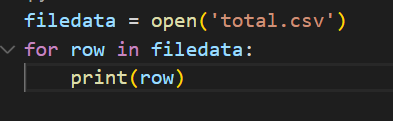


- **using csv module**

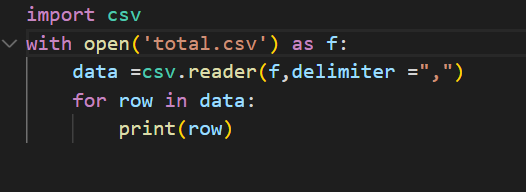

- **using pandas module**

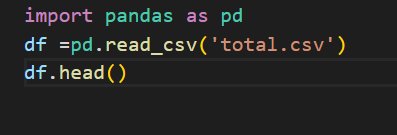

[Back to top](#Index)

### 2.4.1 Reading Sample Data

The sample dataset that was generated for the testing purposes had columns similar to the mrts dataset which included date columns along with sales and name columns. Pandas module was used to read through the csv file and itterows was used to iterate through each row whichis required for the insert statement for the database.
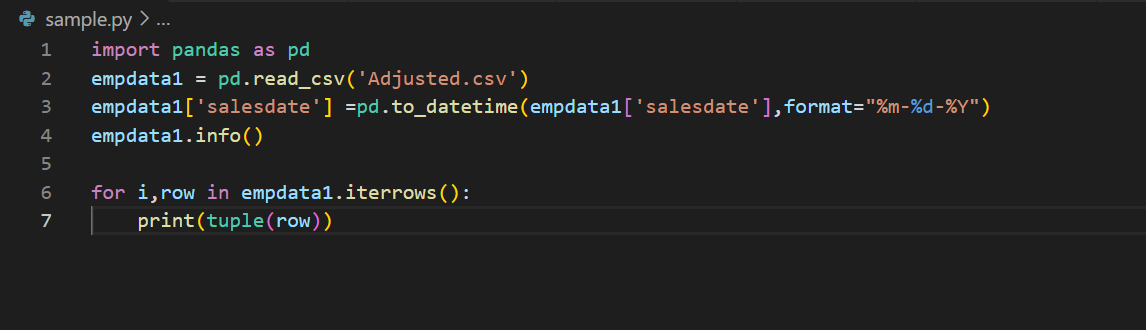

[Back to top](#Index)

### 2.4.2 Reading the MRTS Data

The pandas read_csv function was used to read the csv files.All 4 csv tables created was loaded into a different pandas dataframe using the code above. The date colums which were imported as string while reading the csv files was converted to datetime data type. 

[Back to top](#Index)

### 2.5 Writing an Installation Script

- Generated a .yaml file with mysql credentials.
- Generated the schema with appropriate data types, and added a composite key constraint for each table to avoid duplicate enterie. For example for total table, only rows with unique combination of the sales amount, year and the kind of business  would be inserted into the databse.
- Used python script to generate the schema, followed by loading the data into tables.
- After loading each table a query was incorpprated to fetch the count of rows of each table for initial validation

In [30]:
# Generating the db 

db = yaml.safe_load(open(r"C:\Users\Sajna\Desktop\New folder\db.yaml"))

config ={
    'user': db['user'],
    'password': db['pwrd'],
    'host': db['host'],
    'auth_plugin':'mysql_native_password'
}

cnx =  mysql.connector.connect(**config)

cursor = cnx.cursor()

query = ("""DROP DATABASE IF EXISTS `mrts`;
CREATE DATABASE IF NOT EXISTS `mrts`; 
USE `mrts`;

SET NAMES UTF8MB4;
SET character_set_client = UTF8MB4;

-- --------------------------------------
--  TABLE YEARLY_TOTAL
-- --------------------------------------

CREATE TABLE IF NOT EXISTS `TOTAL`(
	`Kind` 			varchar (150) NOT NULL,
	`years` 			varchar(50) NULL,	
	`Total` 			varchar(50) NULL ,
	CONSTRAINT combined_sales UNIQUE(Total,Kind,years)) 
ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4 COLLATE=utf8mb4_0900_ai_ci;

-- --------------------------------------
--  TABLE REVENUE_ADJUSTED
-- --------------------------------------

CREATE TABLE IF NOT EXISTS `ADJUSTED`(
	`NAICS_CODE` 		varchar (50),
	`salesdate` 		date NOT NULL,
	`Kind` 			varchar (150) NOT NULL,
	`sales` 			varchar(50) NULL,	
	`adjusted` 			varchar(10) NULL ,
	CONSTRAINT Adj_sales UNIQUE(Kind,salesdate,sales)) 
ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4 COLLATE=utf8mb4_0900_ai_ci;

-- --------------------------------------
--  TABLE REVENUE_COMBINED
-- --------------------------------------

CREATE TABLE IF NOT EXISTS `COMBINED_CATEGORY`(
	`salesdate` 		date NOT NULL,
	`Kind` 			varchar (150) NOT NULL,
	`sales` 			varchar(50) NULL,	
	`adjusted` 			varchar(10) NULL ,
	CONSTRAINT cc_sales UNIQUE(Kind,salesdate,sales)) 
ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4 COLLATE=utf8mb4_0900_ai_ci;

-- --------------------------------------
--  TABLE REVENUE_IND_CATEGORY
-- --------------------------------------

CREATE TABLE IF NOT EXISTS `IND_CATEGORY`(
	`NAICS_CODE` 		varchar (50),
	`salesdate` 		date NOT NULL,
	`Kind` 			varchar (150) NOT NULL,
	`sales` 			varchar(50) NULL,	
	`adjusted` 			varchar(10) NULL ,
	CONSTRAINT uc_sales UNIQUE(NAICS_CODE,Kind,salesdate,sales)) 
ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4 COLLATE=utf8mb4_0900_ai_ci;""")

cursor.execute(query)
    
cursor.close()
cnx.close()

In [31]:
# loading the data from the 4 csv files to the mysql tables

db = yaml.safe_load(open(r"C:\Users\Sajna\Desktop\New folder\db.yaml"))

config ={
    'user': db['user'],
    'password': db['pwrd'],
    'host': db['host'],
    'database':db['db'],
    'auth_plugin':'mysql_native_password'
}

cnx =  mysql.connector.connect(**config)

cursor = cnx.cursor()



#Inserting data from Total.csv to the db

empdata = pd.read_csv(r"D:\MIT Data Engineering\Module 8\total.csv")
empdata.head()
for i,row in empdata.iterrows():
    sql = ('INSERT INTO `total` VALUES(%s,%s,%s)')
    cursor.execute(sql,tuple(row))
    cnx.commit()

print('Data inserted to Total table')

# query for data validation
query = ("SELECT count(*) FROM total ")
cursor.execute(query)

# print all the first cell of all the rows
for row in cursor.fetchall():
    print(row)

    
    
#Inserting the data from Adjusted.csv to the db

empdata = pd.read_csv(r"D:\MIT Data Engineering\Module 8\Adjusted.csv")
empdata['salesdate'] =pd.to_datetime(empdata['salesdate'])

for i,row in empdata.iterrows():
    sql = ('INSERT INTO `ADJUSTED` VALUES(%s,%s,%s,%s,%s)')
    cursor.execute(sql,tuple(row))
    cnx.commit()
print('Data inserted to Adjusted table')

# Query for data validation
query = ("SELECT count(*) FROM ADJUSTED ")
cursor.execute(query)

# print all the first cell of all the rows
for row in cursor.fetchall():
    print(row)


    
# Inserting data from combined.csv to the db

empdata = pd.read_csv(r"D:\MIT Data Engineering\Module 8\combined.csv")
empdata['salesdate'] =pd.to_datetime(empdata['salesdate'])

for i,row in empdata.iterrows():
    sql = ('INSERT INTO `COMBINED_CATEGORY` VALUES(%s,%s,%s,%s)')
    cursor.execute(sql,tuple(row))
    cnx.commit()
print('Data inserted to combined table')

# query for data validation
query = ("SELECT count(*) FROM COMBINED_CATEGORY ")
cursor.execute(query)

# print all the first cell of all the rows
for row in cursor.fetchall():
    print(row)


    
# Inserting data from unique.csv to db
empdata = pd.read_csv(r"D:\MIT Data Engineering\Module 8\unique.csv")
empdata['salesdate'] =pd.to_datetime(empdata['salesdate'])

for i,row in empdata.iterrows():
    sql = ('INSERT INTO `IND_CATEGORY` VALUES(%s,%s,%s,%s,%s)')
    cursor.execute(sql,tuple(row))
    cnx.commit()
    
print('Data inserted to Ind_category table')

# Query for data validation
query = ("SELECT count(*) FROM IND_CATEGORY ")
cursor.execute(query)

# print all the first cell of all the rows
for row in cursor.fetchall():
    print(row)

cursor.close()
cnx.close()

Data inserted to Total table
(1885,)
Data inserted to Adjusted table
(13224,)
Data inserted to combined table
(2436,)
Data inserted to Ind_category table
(20184,)



[Back to top](#Index)

## 3. Analysis and Visualization


Running queries in Mysql work bench is faster that python environment as python has to establish a connection and load the program. Python is case senitive while sql isn't which need to be taken into account when running queries using the python environment.<br>
Mysql saves date in just one format which could lead to confusion but while queryingthe data using python envt, we can chaneg the date format while fetching the data. Similarly Mysql lacks the ability to pivot which has to be compensated by using the numerous case statements, while pandas has the capability to pivot which could be leveraged while using python environment for querying and analysing data.<br>
The main advantages of python environment is the seemless intergrating of other modules that help us manipulate, analyse, and visualise the data.


[Back to top](#Index)

### 3.1 Running Queries in MySQL Workbench

- Ran queries to match the number of rows in the tables with the data count in the uploaded csv's.
- validated the data by running queries to match the yearly sales and the aggregrate of individual month for the year and verified with the original dataset values

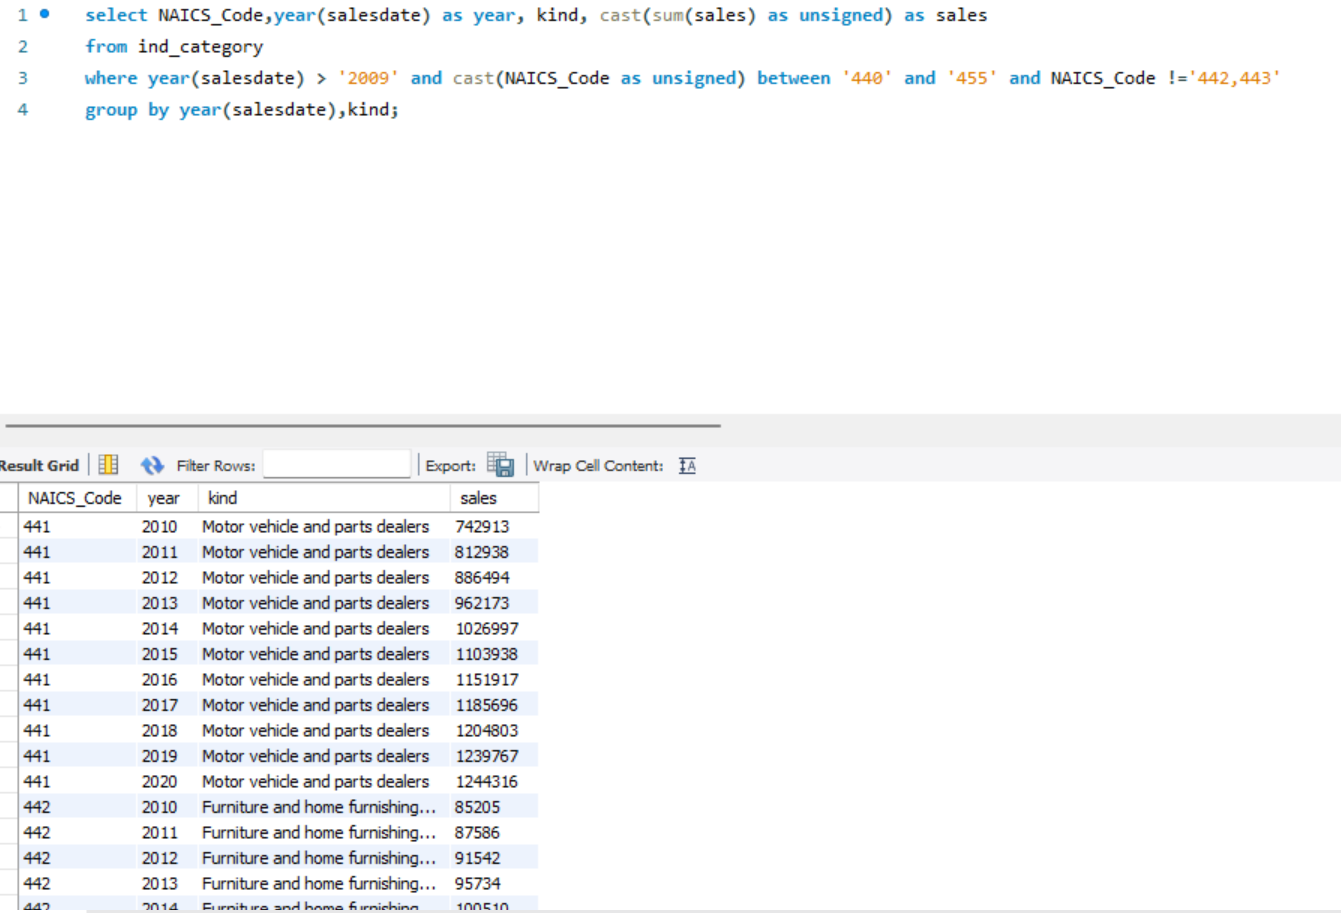
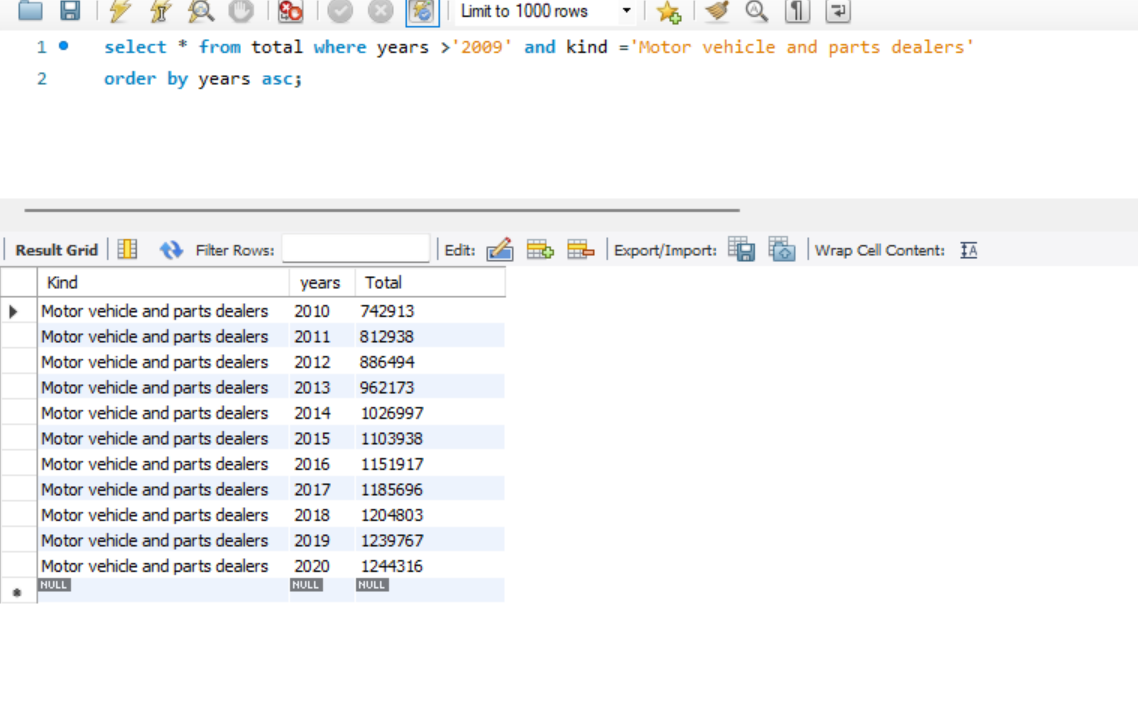


[Back to top](#Index)

### 3.2 Running Queries From Python

The below python script was tested for running queries and fetching the data but was later modified to incorporate pandas dataframe to save the fetched data.
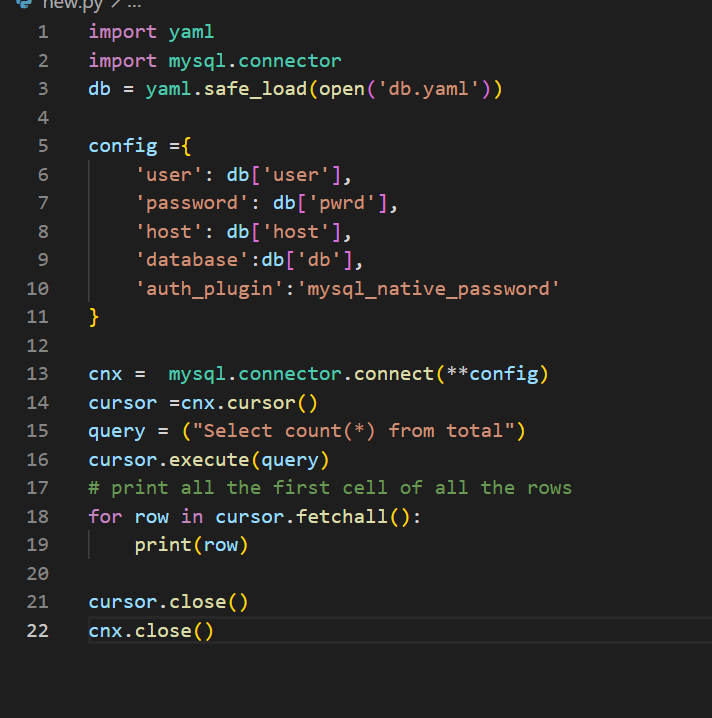
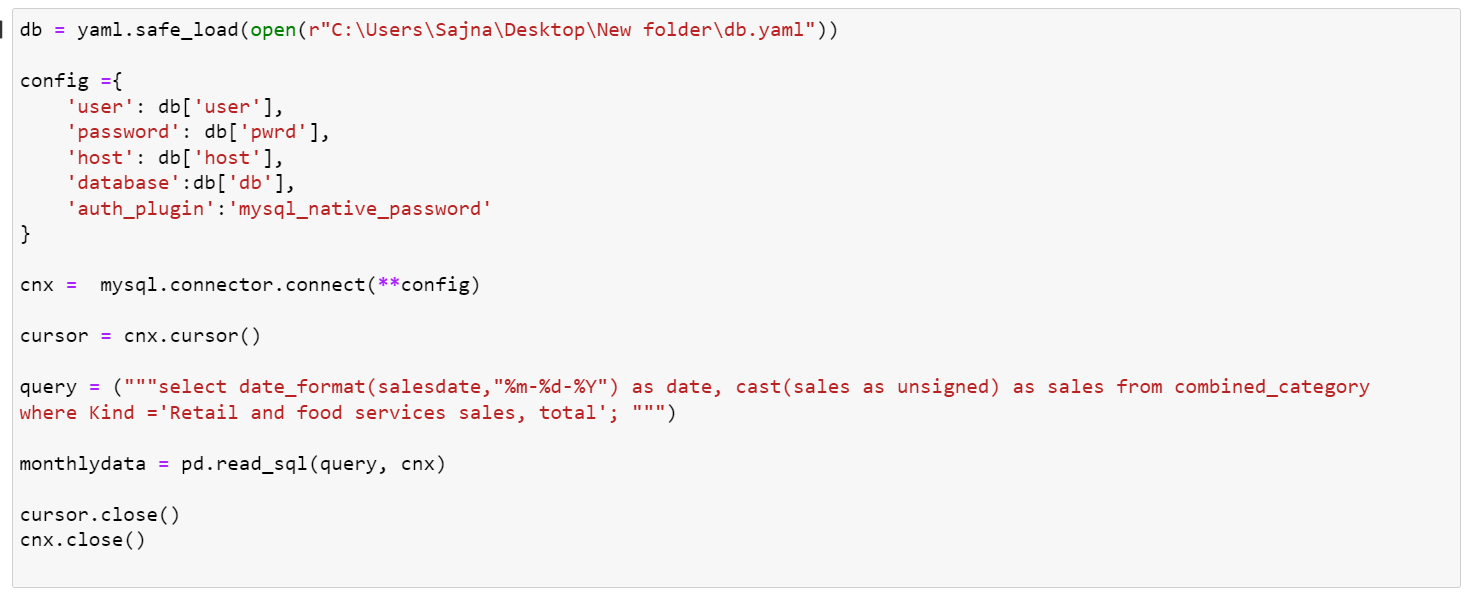

[Back to top](#Index)

### 3.3 Explore Trends

The trend is one of the basic principles of technical analysis, which studies the movements of the prices through charts and indicators based on the prices of assets. Every financial asset it will have variables that will define the trend in prices continuously in the short, medium and long term.
It hepls in identifying the level of productivity, Develop forecasts, Evaluate regulatory requirements, Identify business market share and business potential and manage,plan investments.

Trend types
The trend depends on the term, and therefore there are 3 types:<br>
- Short - Short term trends may seem insignificant as they do not affect the long term, but there are trends that last for hours or days.
- Medium: medium-term trends are those that can last for weeks or months, and most are corrections of the long-term trend, performing the opposite movement.
- Long: and finally, long-term trends are those that are the main trend of an asset, and can last for years or even decades.

A trend could be:<br>

- Uptrend: If the time series analysis shows an upward slope, then the trend is an uptrend.
- Downtrend: If the time series analysis shows a downward slope, then the trend is a downtrend.
- Stationary trend: If the time series analysis doesn’t show any slope, then the trend is stationary.

In [32]:
#Query to generate the monthly sales value for Retail & food services total
db = yaml.safe_load(open(r"C:\Users\Sajna\Desktop\New folder\db.yaml"))

config ={
    'user': db['user'],
    'password': db['pwrd'],
    'host': db['host'],
    'database':db['db'],
    'auth_plugin':'mysql_native_password'
}

cnx =  mysql.connector.connect(**config)

cursor = cnx.cursor()

query = ("""select date_format(salesdate,"%m-%d-%Y") as date, cast(sales as unsigned) as sales from combined_category
where Kind ='Retail and food services sales, total'; """)

monthlydata = pd.read_sql(query, cnx)

cursor.close()
cnx.close()


In [33]:
monthlydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    348 non-null    object
 1   sales   348 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.6+ KB


In [34]:
#Converting date column to datetime format
monthlydata['date']= pd.to_datetime(monthlydata['date'])

In [35]:
monthlydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    348 non-null    datetime64[ns]
 1   sales   348 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.6 KB


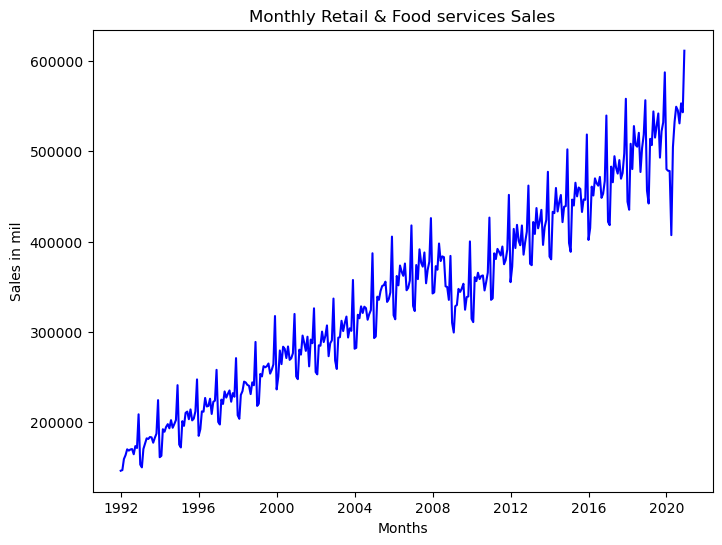

In [36]:
#generating the graph for the monthly ales trend for Retail & Food services

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(monthlydata['date'], monthlydata['sales'], color = 'blue')
plt.xlabel('Months') 
plt.ylabel('Sales in mil')
plt.title("Monthly Retail & Food services Sales")
plt.show()

**Reviewing the plot, it suggests that there may be an increasing sales trend throughout the historical change and there is also seasonality and height of the cycles appears to be increasing, suggesting that it is multiplicative.**

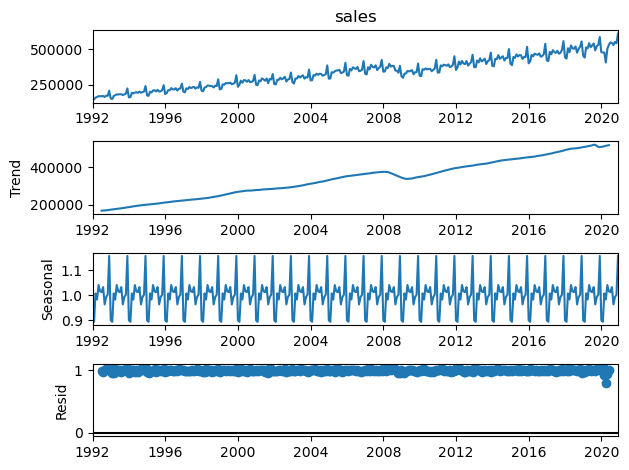

In [37]:
#Plot the decomposition of the Time series using statsmodels.tsa.seasonal  

monthlydata.set_index('date',inplace =True)
decomposition = sm(monthlydata['sales'],model ='multiplicable', period = 12)
decomposition.plot()
plt.show()

The graph shows the various components of the time series graph of sales values - Trend, seasonality and residue

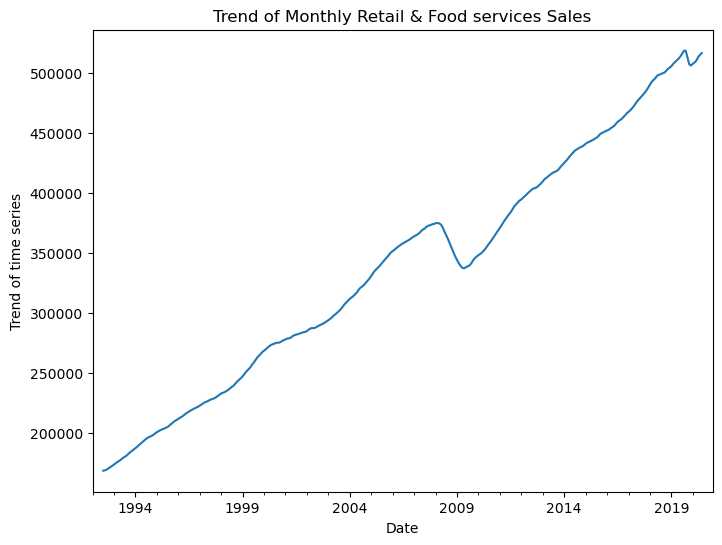

In [38]:
# Plot the Trend component in time series

decomp_trend = decomposition.trend
ax = decomp_trend.plot(figsize=(8, 6))
ax.set_xlabel('Date')
ax.set_ylabel('Trend of time series')
ax.set_title('Trend of Monthly Retail & Food services Sales')
plt.show()


_**Once the seasonal variation is removed from the graph, the graph clearly shows an upward trend with a slight dip during the recession years of 2008 - 2009**_

### Bookstores, Sporting Goods Stores, and Hobbies, Toys, and Games Stores

In [39]:
# query for generating the monthly sales amount of the boos tores, sporting goods and hobby stores categories

db = yaml.safe_load(open(r"C:\Users\Sajna\Desktop\New folder\db.yaml"))

config ={
    'user': db['user'],
    'password': db['pwrd'],
    'host': db['host'],
    'database':db['db'],
    'auth_plugin':'mysql_native_password'
}

cnx =  mysql.connector.connect(**config)

cursor = cnx.cursor()

query = ("""select date_format(salesdate,"%m-%d-%Y") as date, cast(sum(case when Kind ='Book stores' then sales else 0 end)as unsigned)as bookstores,
cast(sum(case when Kind ='Sporting goods stores' then sales else 0 end)as unsigned) as Sporting_goods,
cast(sum(case when Kind ='Hobby, toy, and game stores' then sales else 0 end)as unsigned) as Hobbystores
from ind_category
group by salesdate; """)

gamestoresdata = pd.read_sql(query, cnx)

cursor.close()
cnx.close()


In [40]:
gamestoresdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            348 non-null    object
 1   bookstores      348 non-null    int64 
 2   Sporting_goods  348 non-null    int64 
 3   Hobbystores     348 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 11.0+ KB


In [41]:
gamestoresdata.head()

,date,bookstores,Sporting_goods,Hobbystores
0,01-01-1992,790,972,620
1,02-01-1992,539,1100,585
2,03-01-1992,535,1214,643
3,04-01-1992,523,1267,706
4,05-01-1992,552,1293,660


In [42]:
# Converting the date column to datetime
gamestoresdata['date']= pd.to_datetime(gamestoresdata['date'])

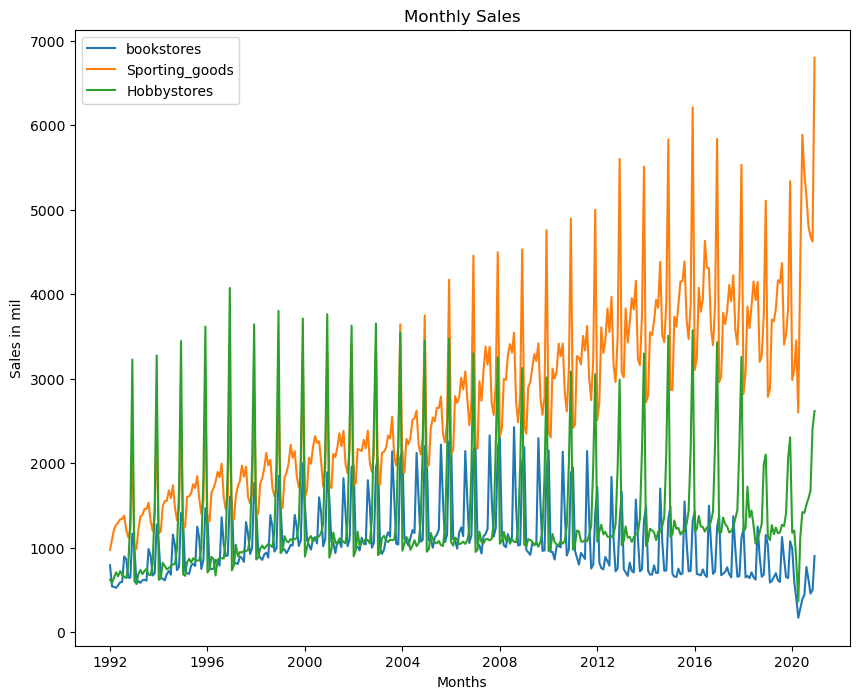

In [43]:
# Plotting the graph for monthly sales for bookstores, sporting goods & hobby stores

fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(gamestoresdata['date'], gamestoresdata['bookstores'])
ax.plot(gamestoresdata['date'], gamestoresdata['Sporting_goods'])
ax.plot(gamestoresdata['date'], gamestoresdata['Hobbystores'])
ax.legend(['bookstores','Sporting_goods','Hobbystores'])
plt.xlabel('Months') 
plt.ylabel('Sales in mil')
plt.title("Monthly Sales")
plt.show()

_**The monthly trend of all three categories show seasonality. The bookstore sales shows a decline while sporting goods sales showed increase in sales**_

In [44]:
#Creating a copy of gamestroedata for aggregrating game storedata
agg_data = gamestoresdata.copy()
agg_data['date'] =agg_data['date'].dt.year # Converting date to year

In [45]:
agg_data.head()

,date,bookstores,Sporting_goods,Hobbystores
0,1992,790,972,620
1,1992,539,1100,585
2,1992,535,1214,643
3,1992,523,1267,706
4,1992,552,1293,660


In [46]:
# Aggregating the data based on year
agg_data =agg_data.groupby(['date']).sum()
agg_data.head()

,bookstores,Sporting_goods,Hobbystores
date,,,
1992,8327,15583,11251
1993,9108,16791,11651
1994,10107,18825,12850
1995,11196,19869,13714
1996,11905,20810,14502


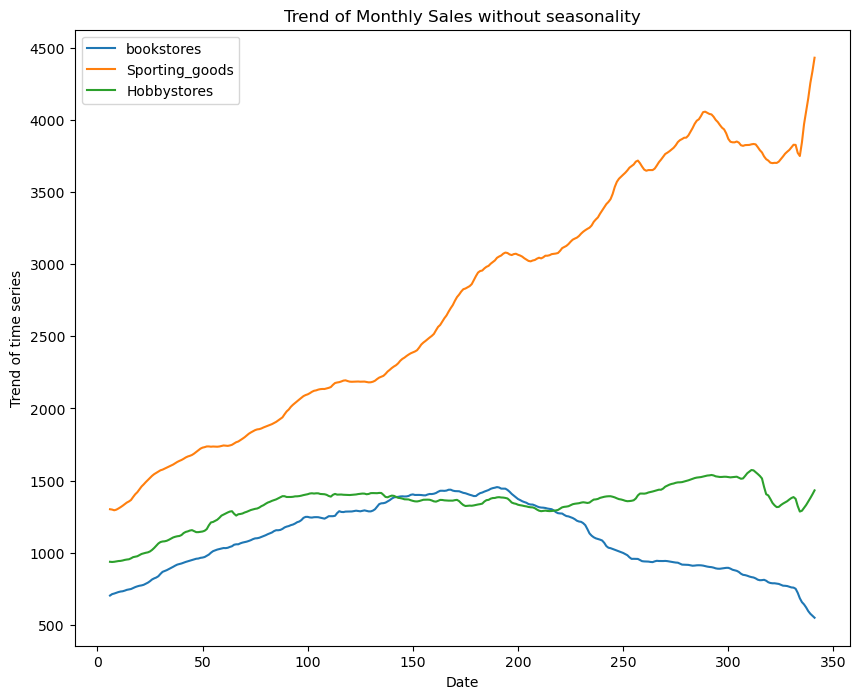

In [47]:
# Plotting the monthly sales trend of teh 3 stores after removing seasonality

#gamestoresdata.set_index('date',inplace =True)
fig, ax = plt.subplots(figsize=(10, 8))
bookstore = sm(gamestoresdata['bookstores'],model ='multiplicable', period = 12)
Sporting = sm(gamestoresdata['Sporting_goods'],model ='multiplicable', period = 12)
Hobby = sm(gamestoresdata['Hobbystores'],model ='multiplicable', period = 12)
bookstore.trend.plot()
Sporting.trend.plot()
Hobby.trend.plot()
plt.legend(['bookstores','Sporting_goods','Hobbystores'])
plt.xlabel('Date')
plt.ylabel('Trend of time series')
plt.title('Trend of Monthly Sales without seasonality')
plt.show()


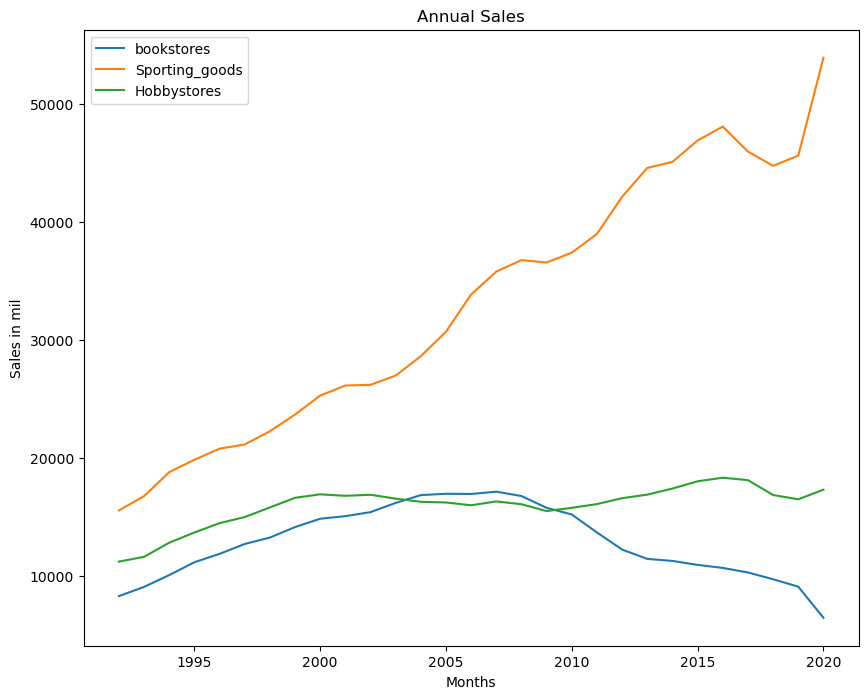

In [48]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(agg_data.index, agg_data['bookstores'])
ax.plot(agg_data.index, agg_data['Sporting_goods'])
ax.plot(agg_data.index, agg_data['Hobbystores'])
ax.legend(['bookstores','Sporting_goods','Hobbystores'])
plt.xlabel('Months') 
plt.ylabel('Sales in mil')
plt.title("Annual Sales")
plt.show()

**The Annual trend of sales gives us a much better picture of the sales trend in the 3 categories.<br>
Sporting goods clearly has the highest and steepest increase in sales. The book sales has a upward sales trend till around 2008 and decline since then.**<br>

**The hobbies, toys, and games store sales show an upward trend till 2000 following by a slight decline in sales and an increase in sale post 2010.**


[Back to top](#Index)

### 3.4 Explore Percentage Change

Percent of change is a mathematical formula for calculating the degree of change over time. In finance, the percentage change formula is often used to track the prices of both large market indexes and individual securities and compare the values of different currencies.Balance sheets with comparative financial statements will generally include the prices of specific assets at different points in time along with the percentage changes over the accompanying time periods. For example, a company might use percentage change to illustrate revenue growth year over year (YOY) in its balance sheet<br>

The following analysis uses Pandas' Percent Change function to evaluate sales data from the men's and women's clothing stores.

In [49]:
# query to generate the monthly sales for the all clothing stores, mens store nd womens store

db = yaml.safe_load(open(r"C:\Users\Sajna\Desktop\New folder\db.yaml"))

config ={
    'user': db['user'],
    'password': db['pwrd'],
    'host': db['host'],
    'database':db['db'],
    'auth_plugin':'mysql_native_password'
}

cnx =  mysql.connector.connect(**config)

cursor = cnx.cursor()

query = ("""select date_format(salesdate,"%m-%d-%Y") as date, cast(sum(case when Kind ="Men's clothing stores" then sales else 0 end)as unsigned)as mens,
cast(sum(case when Kind ="Women's clothing stores" then sales else 0 end)as unsigned) as womens,
cast(sum(case when Kind ='Clothing stores' then sales else 0 end)as unsigned) as clothing
from ind_category
group by salesdate;""")

clothdata = pd.read_sql(query, cnx)

cursor.close()
cnx.close()


In [50]:
clothdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      348 non-null    object
 1   mens      348 non-null    int64 
 2   womens    348 non-null    int64 
 3   clothing  348 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 11.0+ KB


In [51]:
clothdata

,date,mens,womens,clothing
0,01-01-1992,701,1873,4852
1,02-01-1992,658,1991,5159
2,03-01-1992,731,2403,6024
3,04-01-1992,816,2665,6682
4,05-01-1992,856,2752,6768
...,...,...,...,...
343,08-01-2020,379,2386,12933
344,09-01-2020,401,2494,12912
345,10-01-2020,0,2634,14165
346,11-01-2020,0,2726,15038


In [52]:
# finding the mean of the vatrious columns of the dataframe & casting them as integer
x =clothdata.mean().astype(int)
x

mens          734
womens       2919
clothing    11841
dtype: int32

In [53]:
# Replacing 0 by the mean
clothdata = clothdata.replace(0,x)

In [54]:
clothdata

,date,mens,womens,clothing
0,01-01-1992,701,1873,4852
1,02-01-1992,658,1991,5159
2,03-01-1992,731,2403,6024
3,04-01-1992,816,2665,6682
4,05-01-1992,856,2752,6768
...,...,...,...,...
343,08-01-2020,379,2386,12933
344,09-01-2020,401,2494,12912
345,10-01-2020,734,2634,14165
346,11-01-2020,734,2726,15038


In [55]:
#onverting the date column to datetime
clothdata['date']= pd.to_datetime(clothdata['date'])

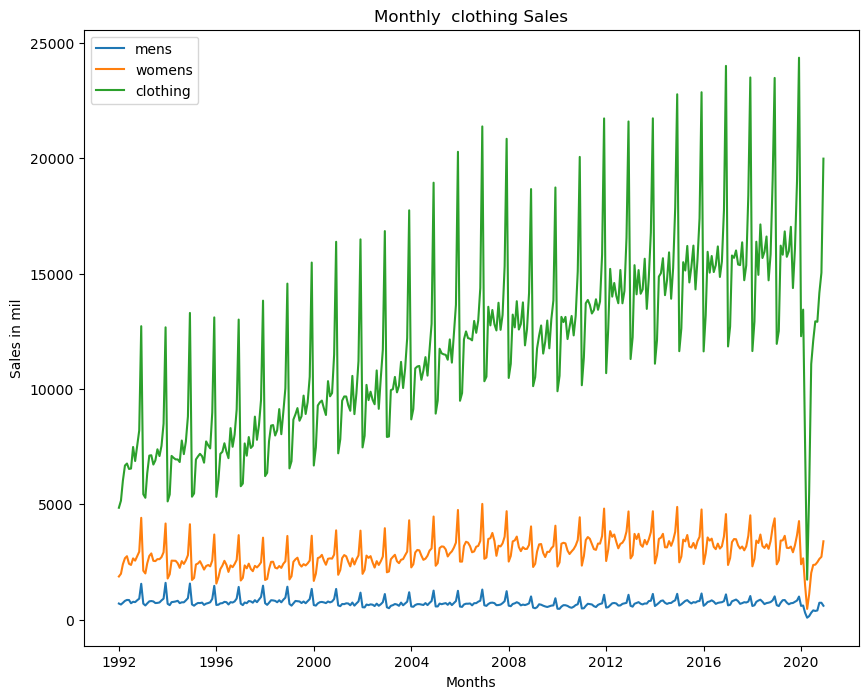

In [56]:
# plotting the graph for monthly sales form mens store, womens store & all clothing stores.
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(clothdata['date'], clothdata['mens'])
ax.plot(clothdata['date'], clothdata['womens'])
ax.plot(clothdata['date'], clothdata['clothing'])
ax.legend(['mens','womens','clothing'])
plt.xlabel('Months') 
plt.ylabel('Sales in mil')
plt.title("Monthly  clothing Sales")
plt.show()

**On Analysing the monthly sales in the men's, women;s and all clothing stores - it clearly shows seasonality. The all clothing stores show an upward trend. All 3 stores show a dip in sales in 2020. The womens and mens clothing store sales have an almost stationary trend**

In [57]:
# making a copy of the clothing dataframe. The null value/ o values have been replaced by the mean value.
PC = clothdata.copy()
PC.set_index('date',inplace =True) # setting the date as the index
PC = PC.pct_change() # calculate the percent change

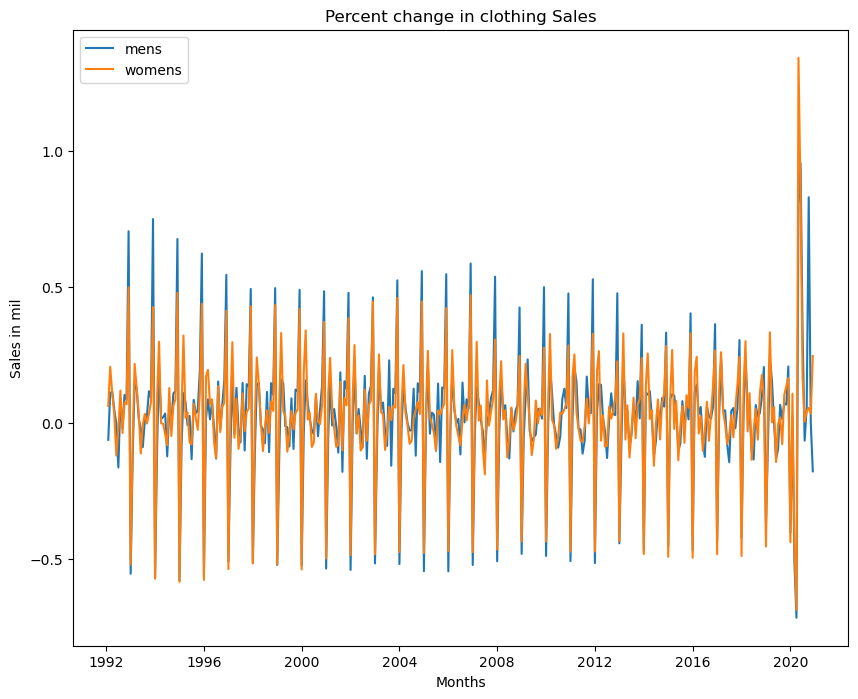

In [58]:
# Ploting the graph for the percent of change 
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(PC.index, PC['mens'])
ax.plot(PC.index, PC['womens'])
ax.legend(['mens','womens'])
plt.xlabel('Months') 
plt.ylabel('Sales in mil')
plt.title("Percent change in clothing Sales")
plt.show()

**The  monthly percent change in the sales in both mens and womens stores follow a similar treand and seasonality**

In [59]:
# Creating a dataframe with aggrgrates of sales yearly
agg_clothdata = clothdata.copy()
agg_clothdata['date'] = agg_clothdata['date'].dt.year
agg_clothdata =agg_clothdata.groupby(['date']).sum()
agg_clothdata

,mens,womens,clothing
date,,,
1992,10179,31815,85370
1993,9962,32350,88127
1994,10032,30585,90161
1995,9315,28696,90708
1996,9546,28238,93712
1997,10069,27822,97722
1998,10196,28332,104128
1999,9667,29549,111681
2000,9507,31447,118097


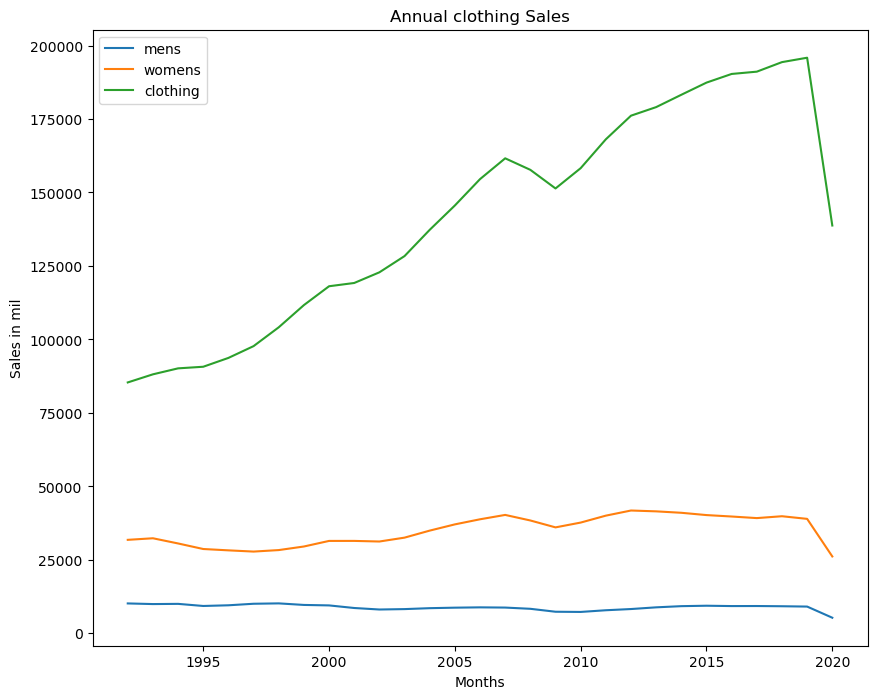

In [60]:
#Plotting the graph for the annual sales for the 3 clothing stores
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(agg_clothdata.index, agg_clothdata['mens'])
ax.plot(agg_clothdata.index, agg_clothdata['womens'])
ax.plot(agg_clothdata.index, agg_clothdata['clothing'])
ax.legend(['mens','womens','clothing'])
plt.xlabel('Months') 
plt.ylabel('Sales in mil')
plt.title("Annual clothing Sales")
plt.show()

In [61]:
#Calculating the percent change for the annual sales
pc_agg =agg_clothdata.pct_change()

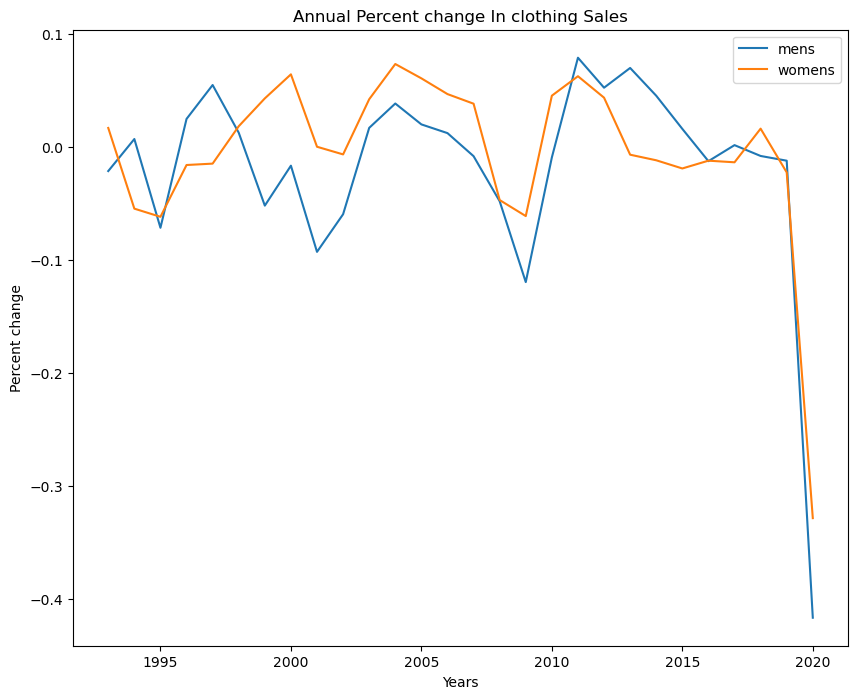

In [62]:
# Plotting the graph for the annual percnet of change 
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(pc_agg.index, pc_agg['mens'])
ax.plot(pc_agg.index, pc_agg['womens'])
ax.legend(['mens','womens','clothing'])
plt.xlabel('Years') 
plt.ylabel('Percent change')
plt.title("Annual Percent change In clothing Sales")
plt.show()

In [63]:
# Calculating the percentage of sales for the mens & womens store when comparing to the parent category "all clothing stores"

agg_clothdata['mens'] = (agg_clothdata['mens']/agg_clothdata['clothing'])*100
agg_clothdata['womens'] = (agg_clothdata['womens']/agg_clothdata['clothing'])*100


In [64]:
agg_clothdata.head()

,mens,womens,clothing
date,,,
1992,11.923392,37.267190,85370
1993,11.304141,36.708387,88127
1994,11.126762,33.922649,90161
1995,10.269216,31.635578,90708
1996,10.186529,30.132747,93712


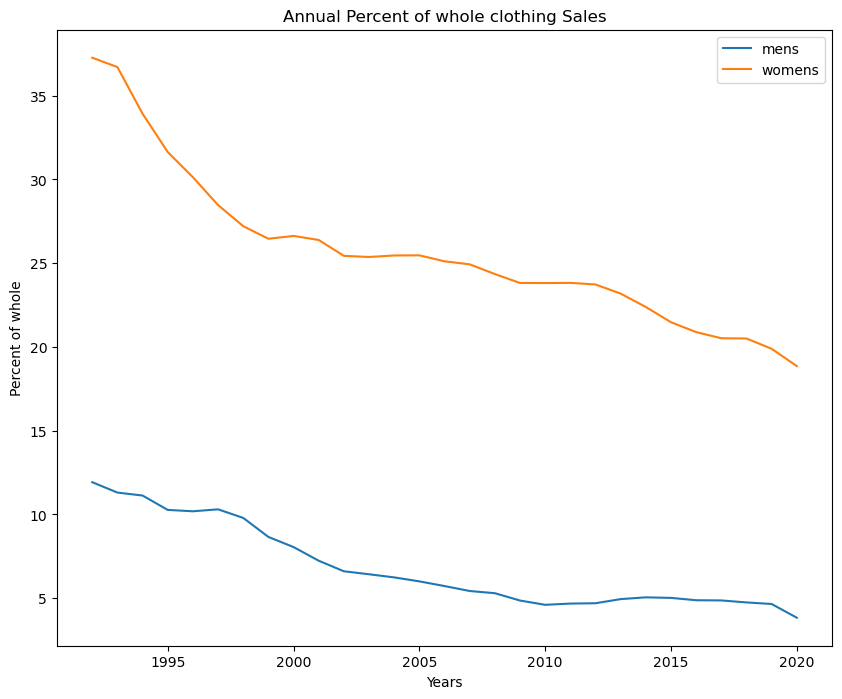

In [65]:
#Plotting  the graph for the percent of whole sales (annualy)
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(agg_clothdata.index, agg_clothdata['mens'])
ax.plot(agg_clothdata.index, agg_clothdata['womens'])
ax.legend(['mens','womens'])
plt.xlabel('Years') 
plt.ylabel('Percent of whole')
plt.title("Annual Percent of whole clothing Sales")
plt.show()

**The  mens clothing stores sales have reduced from ~12 % in 1992 to below 5% in 2020. The womens stores sales dropped from more than 35% in 1992 to nearly 20 % in 2020. The general sales trend of clothing stores is increasing. So the other categories of clothing stores like the family stores are performing better than an exclusive men's or women's store.**

[Back to top](#Index)

### 3.5 Explore Rolling Time Windows


Rolling time windows are used by financial experts to smooth trends in spending patterns.Economic trends are often subject to seasonal variations, making it hard to see underlying trends.Applying moving averages smooths out seasonal fluctuations in the data in order to reduce or remove short-term volatility.For example Fund's rolling returns will give performance results that are smoothed over several periods throughout its history. Such information often paints a more accurate picture for an investor than a single snapshot of one period.Rolling returns can offer better insight into a fund's more comprehensive return history, not skewed by the most recent data (month or quarter-end).

It is important to remember there is a trade-off in smoothing data. While larger the moving averages make the data less volatile it decreases its timeliness. However, other moving averages can be used to offset the loss of timeliness, such as weighted moving averages or a centered moving average.

The following analysis compares 
 
- pharmacies v/s health & personal care .
- new v/s used car dealer sales

In [66]:
#Query to generate the monthly sales for pharmacies , health  personal care stores

db = yaml.safe_load(open(r"C:\Users\Sajna\Desktop\New folder\db.yaml"))

config ={
    'user': db['user'],
    'password': db['pwrd'],
    'host': db['host'],
    'database':db['db'],
    'auth_plugin':'mysql_native_password'
}

cnx =  mysql.connector.connect(**config)

cursor = cnx.cursor()

query = ("""select date_format(salesdate,"%m-%d-%Y") as date, cast(sum(case when Kind ="Health and personal care stores" then sales else 0 end)as unsigned)as personalcare,
cast(sum(case when Kind ="Pharmacies and drug stores" then sales else 0 end)as unsigned) as Pharmacies
from ind_category
where year(salesdate) > '2009'
group by salesdate""")

data = pd.read_sql(query, cnx)

cursor.close()
cnx.close()

In [67]:
#Creating a copy of the dataframe converting the date column to datetime
med_data = data.copy()
med_data.info()
med_data['date']= pd.to_datetime(med_data['date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          132 non-null    object
 1   personalcare  132 non-null    int64 
 2   Pharmacies    132 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.2+ KB


In [68]:
#creating rolling mean for a period of 6 months 
med_data['personalcare'] =med_data['personalcare'].rolling(6).mean()
med_data['Pharmacies'] =med_data['Pharmacies'].rolling(6).mean()

In [69]:
# Dropping the null values
med_data.dropna(inplace = True)
med_data.set_index('date',inplace = True)

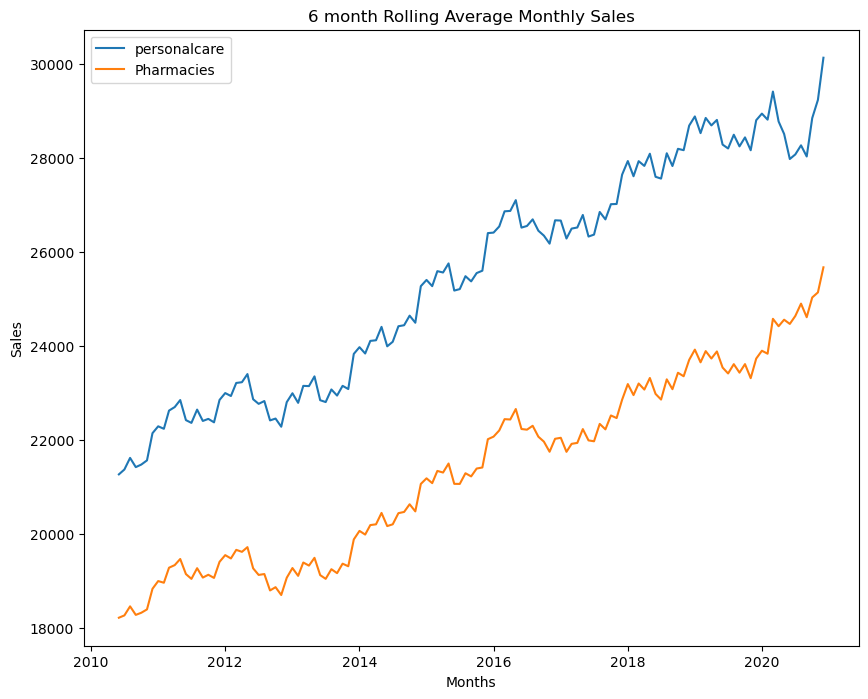

In [70]:
# ploting the 6 month rolling average monthly sales  for the 2 stores
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(med_data.index, med_data['personalcare'])
ax.plot(med_data.index,med_data['Pharmacies'])
ax.legend(['personalcare','Pharmacies'])
plt.xlabel('Months') 
plt.ylabel('Sales')
plt.title("6 month Rolling Average Monthly Sales")
plt.show()

Both the stores have a similar rolling average  upward trend.

In [71]:
# Creating a copy of the dataframe to create a 12 month rolling average
med_data1 = data.copy()
med_data1['date']= pd.to_datetime(med_data1['date'])
med_data1['personalcare'] =med_data1['personalcare'].rolling(12).mean()
med_data1['Pharmacies'] =med_data1['Pharmacies'].rolling(12).mean()
med_data1.dropna(inplace = True)
med_data1.set_index('date',inplace = True)

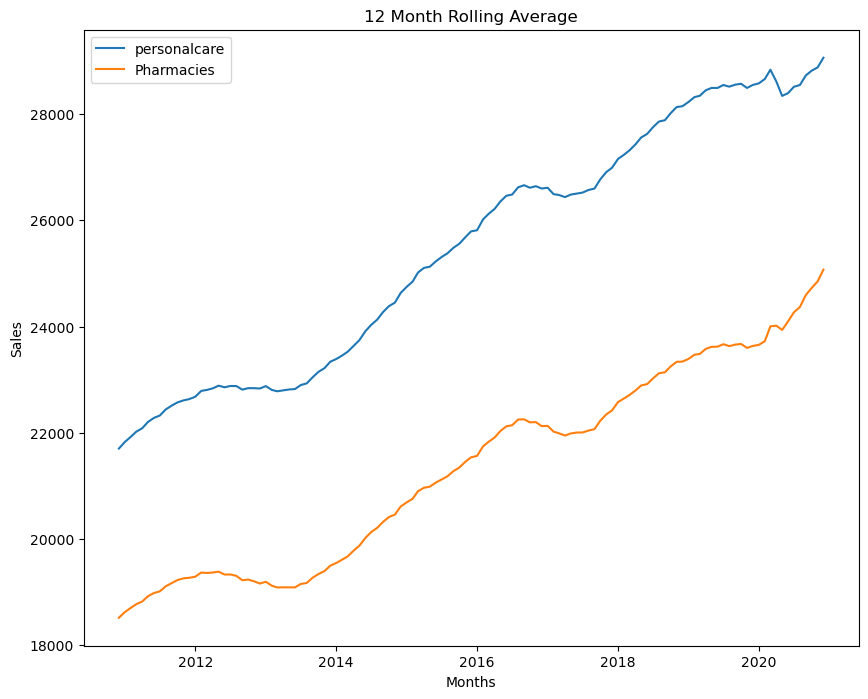

In [72]:
# Plot the 12 month rolloing avaerga
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(med_data1.index, med_data1['personalcare'])
ax.plot(med_data1.index,med_data1['Pharmacies'])
ax.legend(['personalcare','Pharmacies'])
plt.xlabel('Months') 
plt.ylabel('Sales')
plt.title("12 Month Rolling Average")
plt.show()

In [73]:
#Query  to generate the monthly sales of new cars & used car sales
db = yaml.safe_load(open(r"C:\Users\Sajna\Desktop\New folder\db.yaml"))

config ={
    'user': db['user'],
    'password': db['pwrd'],
    'host': db['host'],
    'database':db['db'],
    'auth_plugin':'mysql_native_password'
}

cnx =  mysql.connector.connect(**config)

cursor = cnx.cursor()

query = ("""select date_format(salesdate,"%m-%d-%Y") as date, cast(sum(case when Kind ="New car dealers" then sales else 0 end)as unsigned)as newcars,
cast(sum(case when Kind ="Used car dealers" then sales else 0 end)as unsigned) as usedcars
from ind_category
where year(salesdate) > '2009'
group by salesdate;""")

data1 = pd.read_sql(query, cnx)

cursor.close()
cnx.close()

In [74]:
# Create a copy of the dataframe and convert date column to datetime datatype
cars_data = data1.copy()
cars_data.info()
cars_data['date']= pd.to_datetime(cars_data['date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      132 non-null    object
 1   newcars   132 non-null    int64 
 2   usedcars  132 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.2+ KB


In [75]:
#Creating a 6 month rolling average
cars_data['newcars'] =cars_data['newcars'].rolling(6).mean()
cars_data['usedcars'] = cars_data['usedcars'].rolling(6).mean()

In [76]:
#cropping the nulls
cars_data.dropna(inplace = True)
cars_data.set_index('date',inplace = True)

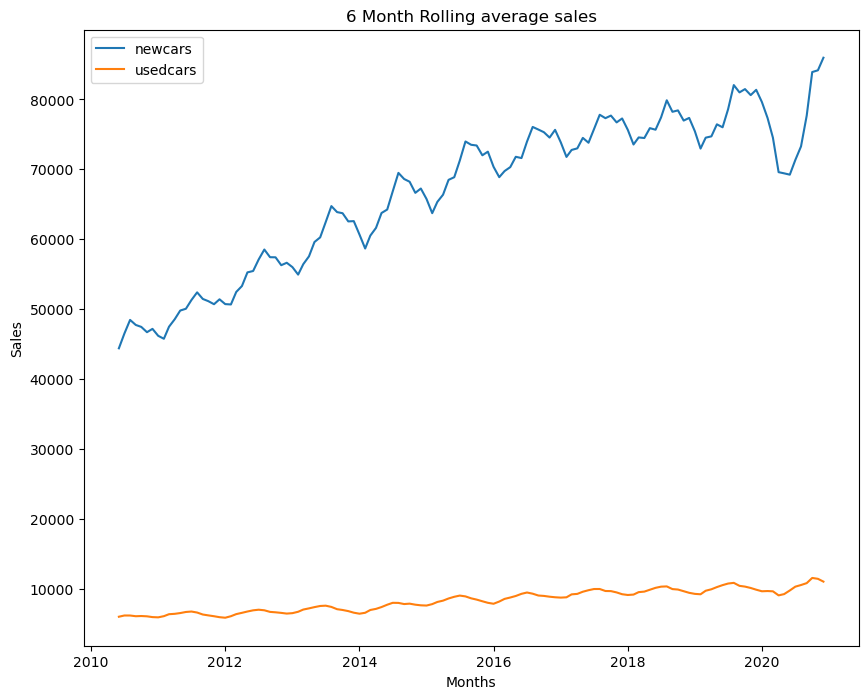

In [77]:
#Plotting the graph for 6 month rolling avaerga
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(cars_data.index, cars_data['newcars'])
ax.plot(cars_data.index,cars_data['usedcars'])
ax.legend(['newcars','usedcars'])
plt.xlabel('Months') 
plt.ylabel('Sales')
plt.title("6 Month Rolling average sales")
plt.show()

In [78]:
# Creating a copy of the datframe to create a 12 month rolling averge datframe
cars_data1 = data1.copy()
cars_data1.info()
cars_data1['date']= pd.to_datetime(cars_data1['date'])
cars_data1['newcars'] =cars_data1['newcars'].rolling(12).mean()
cars_data1['usedcars'] = cars_data1['usedcars'].rolling(12).mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      132 non-null    object
 1   newcars   132 non-null    int64 
 2   usedcars  132 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.2+ KB


In [79]:
#Dropping nulls
cars_data1.dropna(inplace = True)
cars_data1.set_index('date',inplace = True)

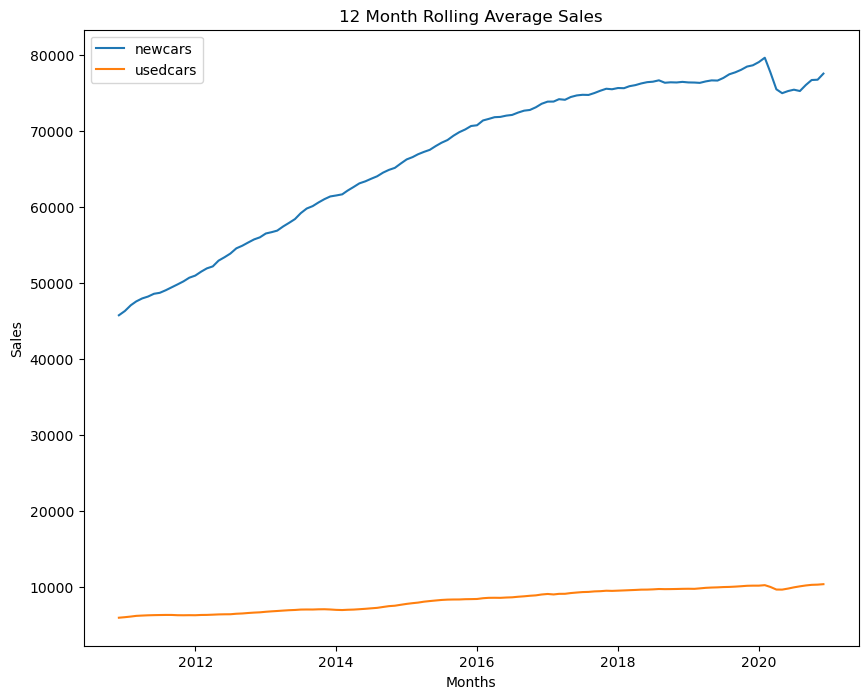

In [80]:
#Plotting acgraph for the 12 month rolling average
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(cars_data1.index, cars_data1['newcars'])
ax.plot(cars_data1.index,cars_data1['usedcars'])
ax.legend(['newcars','usedcars'])
plt.xlabel('Months') 
plt.ylabel('Sales')
plt.title("12 Month Rolling Average Sales")
plt.show()

**Used cars have a almost stationary trend while the new cars have a steep upward trend**

In [81]:
# Query to generate the  annual sales  from 2010 of all the categories with a 3 digit naics code
db = yaml.safe_load(open(r"C:\Users\Sajna\Desktop\New folder\db.yaml"))

config ={
    'user': db['user'],
    'password': db['pwrd'],
    'host': db['host'],
    'database':db['db'],
    'auth_plugin':'mysql_native_password'
}

cnx =  mysql.connector.connect(**config)

cursor = cnx.cursor()

query = ("""select NAICS_Code,year(salesdate) as year, kind, cast(sum(sales) as unsigned) as sales
from ind_category
where year(salesdate) > '2009' and cast(NAICS_Code as unsigned) between '440' and '455' and NAICS_Code !='442,443'
group by year(salesdate),kind;""")

mrts = pd.read_sql(query, cnx)

cursor.close()
cnx.close()

In [82]:
mrts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NAICS_Code  132 non-null    object
 1   year        132 non-null    int64 
 2   kind        132 non-null    object
 3   sales       132 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 4.2+ KB


In [83]:
mrts.head()

,NAICS_Code,year,kind,sales
0,441,2010,Motor vehicle and parts dealers,742913
1,441,2011,Motor vehicle and parts dealers,812938
2,441,2012,Motor vehicle and parts dealers,886494
3,441,2013,Motor vehicle and parts dealers,962173
4,441,2014,Motor vehicle and parts dealers,1026997


In [84]:
#creating a list of all the unique values in the kind column
kind = list(mrts['kind'].unique())

In [85]:
# creating a pivot table with the index as year, kind as columns and sales as values
pivoted = mrts.pivot(index ='year',columns ='kind', values ='sales')

In [86]:
pivoted

kind,Building mat. and garden equip. and supplies dealers,Clothing and clothing access. stores,Electronics and appliance stores,Food and beverage stores,Furniture and home furnishings stores,Gasoline stations,General merchandise stores,Health and personal care stores,Miscellaneous store retailers,Motor vehicle and parts dealers,Nonstore retailers,"Sporting goods, hobby, musical instrument, and book stores"
year,,,,,,,,,,,,
2010,260566,213286,99589,580530,85205,448349,603757,260435,104234,742913,340957,78227
2011,269480,228606,101978,609137,87586,533457,624766,271612,108401,812938,376344,78647
2012,281533,239493,103882,628205,91542,555419,642313,274000,110018,886494,408171,81159
2013,299561,245045,103536,641546,95734,553763,653575,280043,112102,962173,429984,82786
2014,313497,251102,102897,670536,100510,547064,670614,295584,115293,1026997,464182,83651
2015,323930,256926,100257,687473,107816,455747,680138,309489,118490,1103938,498361,85554
2016,337787,261207,93973,702162,112260,436143,682713,319171,120669,1151917,543845,86366
2017,349365,261396,92424,728843,115309,476152,691891,323866,123182,1185696,608194,83896
2018,366225,266881,94002,750000,119094,521453,707094,337765,128408,1204803,676183,81129


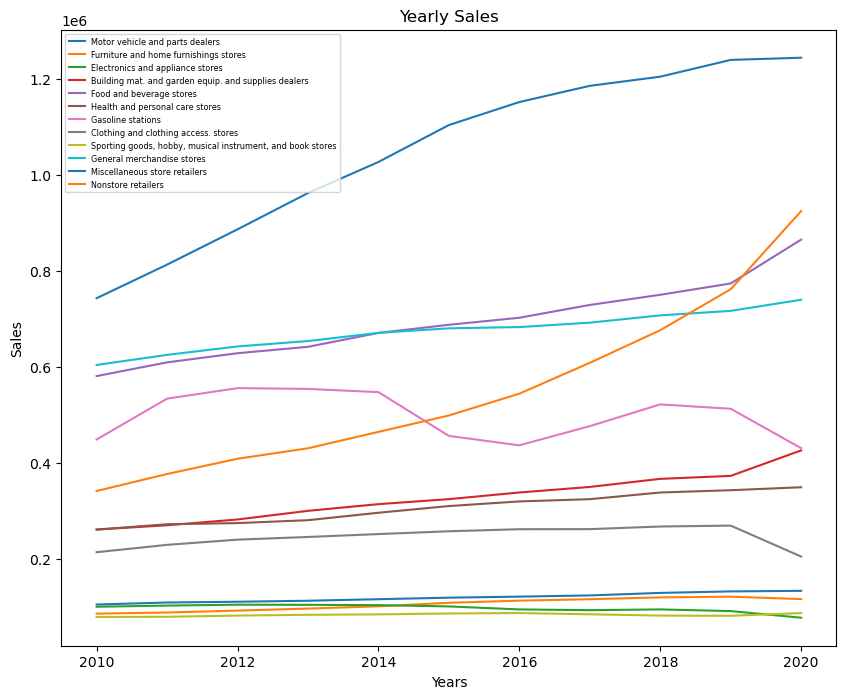

In [87]:
# Using a for loop to generate a graph for  annual sales for all the businesses with 3 digit naics code
fig, ax = plt.subplots(figsize=(10, 8))
for i in kind:
    x = list(pivoted[f"{i}"])
    ax.plot(pivoted.index, x)
ax.legend(kind,fontsize ='xx-small')
plt.xlabel('Years') 
plt.ylabel('Sales')
plt.title("Yearly Sales")
plt.show() 

**The top grossing categories in 2020 are Motor vehicles, Non store retailers and Food & beverages stores. The lowest grossing is sporting goods, hobby and musical instrument & book stores. 
Most of the categories should a change (either increase or decrease) in 2020 which could be associated with covid 19 pandemic.**

[Back to top](#Index)

## Conclusion

Using the MRTS Dataset, we were clearly able to generate a ETL process which fetches the dataset, transforms it, creates and loads the datset into the database. This python script lays the groundwork for automating the whole process and can be run using a windows task scheduler or cron on mac to automate the process incase the dataset is periodicaly updated.
Upon analysis of the economic data a clear influence of covid was visible. The Non store retailers section shows a clear hike in sales during covid. Gasoline stores show a sharp drop in 2020 that could be attributed to covid shutdowns.
Further incorporation of data from 2021 and 2022 would provide further insights into the post covid effects and if the trends developed during covid has a lasting effect or not.
Motor vehicles and part dealers was the category with has the highest spending among customers and clearly has an upward trend dince 2010.
Electronics and appliance stores, Sporting goods, hobby, musical instrument, and book stores are the 2 categories that have the least spending and have a stationary annual sales trend since 2010.


[Back to top](#Index
)
## References


- Ayşenur Özen. "Seasonality Analysis and Forecast in Time Series", 12/5/2022.https://medium.com/swlh/seasonality-analysis-and-forecast-in-time-series-b8fbba820327

- Time series data visualisation. 12/5/2022.
https://towardsai.net/p/l/time-series-data-visualization-in-python

- time series decomposition. 12/5/2022.
https://towardsdatascience.com/time-series-decomposition-in-python-8acac385a5b2

- What is ETL, 12/5/2022. https://www.ibm.com/cloud/learn/etl

-  North American Industry Classification System 12/5/2022.https://www.census.gov/naics/?input=44&chart=2022

- will kenton, 'percentage of changes and how to calculate them'. 12/5/2022
https://www.investopedia.com/terms/p/percentage-change.asp

- AnneCorinne.'What is an economic trend' https://www.infocomm.ky/what-is-an-economic-trend-definition-of-trend-trend-types/#:~:text=What%20is%20an%20economic%20trend%3F%20by%20Annecorinne%20A,when%20there%20is%20talk%20of%20an%20upward%20trend.